
# Tutorial: Revisiting Core Metrics: MAE vs. MSE vs. RMSE

Di Part 3, kita telah belajar cara menghitung metrik-metrik evaluasi dasar. Sekarang, di Part 4, kita akan menyelam lebih dalam untuk membangun **intuisi** di balik metrik-metrik tersebut. Memahami perbedaan fundamental antara Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) sangat penting untuk memilih metrik yang tepat sesuai dengan konteks masalah bisnis.

Di notebook ini, kita akan fokus pada pertanyaan: **"Bagaimana setiap metrik merespons kesalahan, dan apa implikasinya?"**



---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan kembali cara kerja MAE, MSE, dan RMSE.
* Memahami perbedaan utama dalam bagaimana MSE/RMSE **menghukum kesalahan besar** dibandingkan dengan MAE.
* Mendemonstrasikan secara praktis bagaimana *outlier* dalam prediksi memengaruhi setiap metrik.
* Mengembangkan intuisi untuk memilih metrik yang paling sesuai untuk berbagai skenario bisnis.


---
### 2. Setup: Skenario Prediksi Sederhana

Mari kita buat skenario sederhana. Bayangkan kita telah melatih model untuk memprediksi harga sewa apartemen (dalam juta Rupiah per tahun), dan kita memiliki 5 nilai sebenarnya (`y_true`) dan 5 nilai prediksi dari model kita (`y_pred`).



In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
# tema
sns.set_theme(style="whitegrid",context="talk")

# data aktual dan prediksi
y_true = np.array([100,120,150,180,200])
y_pred = np.array([105,122,145,188,195])

# buat dataframe untuk analysis
results_df = pd.DataFrame(
	{
		'Harga Aktual': y_true,
		'Harga Prediksi': y_pred,
	}
)

results_df['Absolute Error'] = np.abs(results_df['Harga Aktual'] - results_df['Harga Prediksi'])
results_df['Squared Error'] = (results_df['Harga Aktual'] - results_df['Harga Prediksi'])**2

print(results_df)

   Harga Aktual  Harga Prediksi  Absolute Error  Squared Error
0           100             105               5             25
1           120             122               2              4
2           150             145               5             25
3           180             188               8             64
4           200             195               5             25


---
### 3. Revisiting the Metrics

Sekarang, mari kita hitung ketiga metrik dari data di atas.



In [3]:
# 1. Mean absolute error (MAE)
mae = mean_absolute_error(y_true,y_pred)
# mae = results_df['Absolute Error'].mean()

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_true,y_pred)
# mse = results_df['Squared Error'].mean()

# 3. Root Mean Squared Error (MSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("Interpretasi: Rata-rata, model kita meleset sebesar 5.00 Juta Rupiah.")
print("-" * 50)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print("Interpretasi: Sulit diinterpretasikan secara langsung (Juta Rupiah Kuadrat).")
print("-" * 50)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Interpretasi: Mirip dengan MAE, tetapi dengan penekanan pada error yang lebih besar.")

Mean Absolute Error (MAE): 5.00
Interpretasi: Rata-rata, model kita meleset sebesar 5.00 Juta Rupiah.
--------------------------------------------------
Mean Squared Error (MSE): 28.60
Interpretasi: Sulit diinterpretasikan secara langsung (Juta Rupiah Kuadrat).
--------------------------------------------------
Root Mean Squared Error (RMSE): 5.35
Interpretasi: Mirip dengan MAE, tetapi dengan penekanan pada error yang lebih besar.


**Observasi Awal:**

Perhatikan bahwa **RMSE (5.35) sedikit lebih besar dari MAE (5.00)**. Ini adalah perilaku yang normal. Karena RMSE mengkuadratkan error sebelum merata-ratakannya, ia memberikan bobot yang lebih besar pada kesalahan yang lebih besar.



---
### 4. Studi Kasus: Efek Satu *Outlier*

Sekarang, mari kita lihat apa yang terjadi jika model kita membuat **satu kesalahan yang sangat besar**. Kita akan mengubah prediksi terakhir dari 195 menjadi 150, menciptakan error sebesar 50.



In [4]:
y_pred = np.array([105,122,145,188,150])

# buat dataframe untuk analysis
results_outlier_df = pd.DataFrame(
	{
		'Harga Aktual': y_true,
		'Harga Prediksi': y_pred,
	}
)

results_outlier_df['Absolute Error'] = np.abs(results_outlier_df['Harga Aktual'] - results_outlier_df['Harga Prediksi'])
results_outlier_df['Squared Error'] = (results_outlier_df['Harga Aktual'] - results_outlier_df['Harga Prediksi'])**2

print(results_outlier_df)

   Harga Aktual  Harga Prediksi  Absolute Error  Squared Error
0           100             105               5             25
1           120             122               2              4
2           150             145               5             25
3           180             188               8             64
4           200             150              50           2500


Perhatikan bagaimana `Squared Error` untuk titik terakhir (2500) sangat mendominasi dibandingkan dengan error lainnya. Sekarang, mari kita hitung ulang metriknya.



In [5]:
# 1. Mean absolute error (MAE)
# mae = mean_absolute_error(y_true,y_pred)
mae_outlier = results_outlier_df['Absolute Error'].mean()

# 2. Mean Squared Error (MSE)
# mse = mean_squared_error(y_true,y_pred)
mse_outlier = results_outlier_df['Squared Error'].mean()

# 3. Root Mean Squared Error (MSE)
rmse_outlier = np.sqrt(mse_outlier)

print("------Perbandingan Metrik------")
print(f"MAE(normal): {mae:.2f} -> MAE(outlier): {mae_outlier:.2f}")
print(f"MSE(normal): {mse:.2f} -> MSE(outlier): {mse_outlier:.2f}")
print(f"RMSE(normal): {rmse:.2f} -> RMSE(outlier): {rmse_outlier:.2f}")

# Hitung perubahan persentase
mae_change = ((mae_outlier-mae)/mae)*100
rmse_change = ((rmse_outlier-rmse)/rmse)*100

print(f"Perubahan MAE(outlier): {mae_change:.2f}%")
print(f"Perubahan RMSE(outlier): {rmse_change:.2f}%")

------Perbandingan Metrik------
MAE(normal): 5.00 -> MAE(outlier): 14.00
MSE(normal): 28.60 -> MSE(outlier): 523.60
RMSE(normal): 5.35 -> RMSE(outlier): 22.88
Perubahan MAE(outlier): 180.00%
Perubahan RMSE(outlier): 327.87%


**HASIL YANG SANGAT PENTING!**

Dengan adanya satu kesalahan besar:
* **MAE meningkat 3 kali lipat** (dari 5.0 menjadi 14.0). Kenaikannya bersifat linear.
* **RMSE meningkat 4.2 kali lipat** (dari 5.35 menjadi 22.88). Kenaikannya jauh lebih dramatis.

**Visualisasi Hukuman**



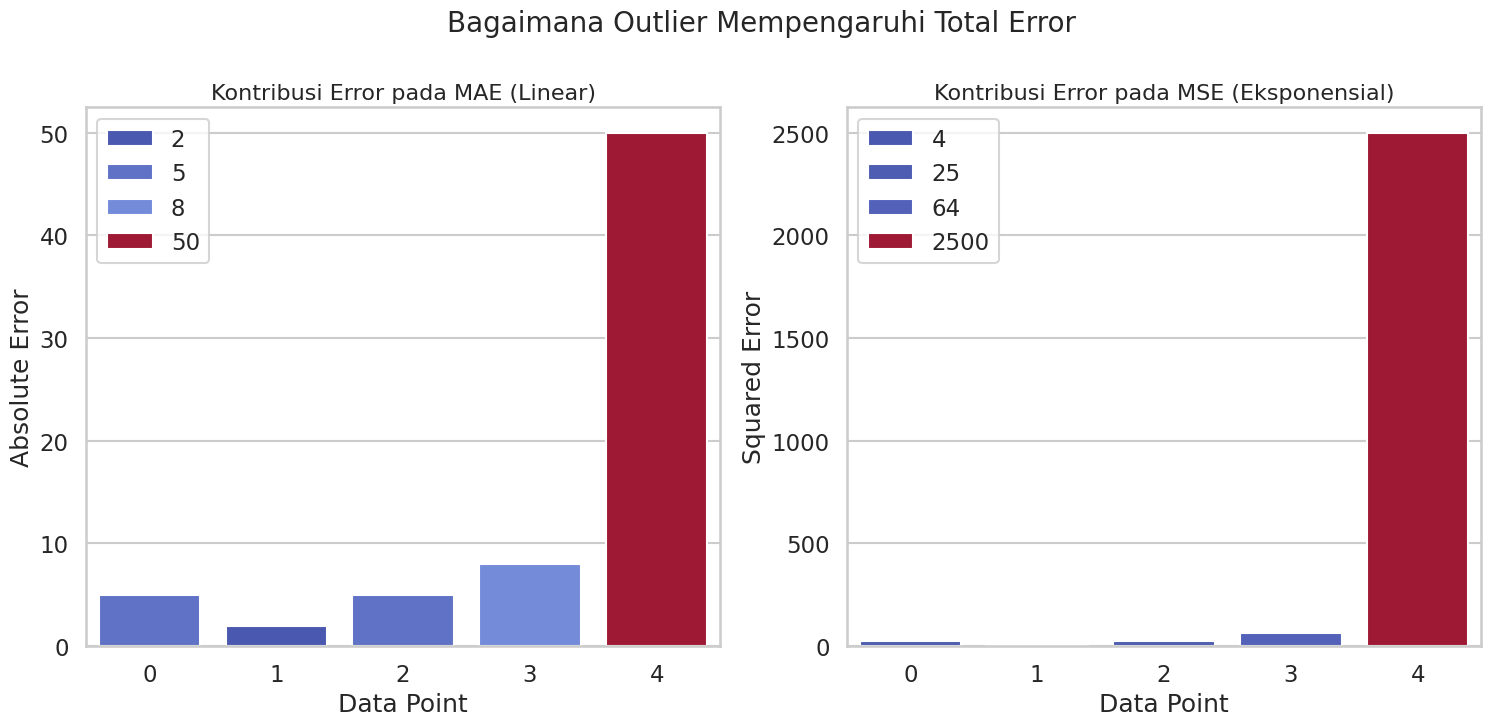

In [6]:
errors = results_outlier_df['Absolute Error']
squared_errors = results_outlier_df['Squared Error']

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(x=errors.index, y=errors.values, ax=ax[0], palette='coolwarm',hue=errors.values)
ax[0].set_title('Kontribusi Error pada MAE (Linear)', fontsize=16)
ax[0].set_ylabel('Absolute Error')
ax[0].set_xlabel('Data Point')


sns.barplot(x=squared_errors.index, y=squared_errors.values, ax=ax[1], palette='coolwarm', hue=squared_errors.values)
ax[1].set_title('Kontribusi Error pada MSE (Eksponensial)', fontsize=16)
ax[1].set_ylabel('Squared Error')
ax[1].set_xlabel('Data Point')


plt.suptitle('Bagaimana Outlier Mempengaruhi Total Error', fontsize=20, y=1.02)
plt.show()

Visualisasi di atas menunjukkan dengan jelas: `Squared Error` dari titik ke-4 (indeks) sangat mendominasi total error, sementara pada `Absolute Error`, kontribusinya lebih seimbang.



---
### 5. Kesimpulan & Kapan Menggunakannya

| Metrik | Kekuatan | Kelemahan | Kapan Digunakan? |
| :--- | :--- | :--- | :--- |
| **MAE** | Sangat mudah diinterpretasikan. Robust (tidak terlalu sensitif) terhadap outlier. | Tidak mendiferensiasikan antara banyak error kecil vs. sedikit error besar. | Saat Anda ingin metrik yang mudah dijelaskan dan jika outlier dianggap sebagai anomali yang tidak terlalu penting. |
| **RMSE** | Menghukum kesalahan besar dengan keras. Paling umum digunakan dalam literatur akademis dan kompetisi. | Lebih sensitif terhadap outlier. | **Pilihan default yang baik**. Saat kesalahan besar sangat tidak diinginkan dan harus diminimalkan (misalnya, prediksi permintaan stok, prediksi kegagalan mesin). |

**Aturan Praktis:**

> Jika nilai **RMSE jauh lebih besar daripada MAE**, ini adalah indikasi kuat bahwa model Anda membuat beberapa kesalahan yang sangat besar (*outlier*). Ini adalah sinyal untuk menyelidiki prediksi-prediksi terburuk Anda.



Dengan pemahaman yang lebih dalam ini, Anda sekarang dapat memilih metrik evaluasi yang tidak hanya memberi Anda angka, tetapi juga menceritakan kisah tentang *bagaimana* model Anda membuat kesalahan.
